In [40]:
# Importance of Data Cleaning

# 1. Missing Values: Missing data points in a dataset can lead to biased results.
#     Task 1: Load a dataset and identify which columns have missing values.
#     Task 2: Replace missing values in a dataset with the column mean or mode.
#     Task 3: Compare model performance with and without handling missing values.
    





In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample dataset with a target variable
data_with_missing = {
    'ID': [1, 2, 3, 4, 5],
    'Height_cm': [170, 180, None, 175, 165],
    'Weight_kg': [65, None, 50, 70, 55],
    'Age': [25, 30, 22, None, 29],
    'Target': [22, 25, 18, 24, 20]  # Example target variable
}

df_with_missing = pd.DataFrame(data_with_missing)

# Split the data into training and testing sets without handling missing values
X = df_with_missing[['Height_cm', 'Weight_kg', 'Age']]
y = df_with_missing['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model without handling missing values
model_without_imputation = LinearRegression()

try:
    model_without_imputation.fit(X_train, y_train)
    y_pred_without_imputation = model_without_imputation.predict(X_test)
    mse_without_imputation = mean_squared_error(y_test, y_pred_without_imputation)
except ValueError as e:
    mse_without_imputation = str(e)

# Now handle missing values
df_with_missing['Height_cm'].fillna(df_with_missing['Height_cm'].mean(), inplace=True)
df_with_missing['Weight_kg'].fillna(df_with_missing['Weight_kg'].mean(), inplace=True)
df_with_missing['Age'].fillna(df_with_missing['Age'].mean(), inplace=True)

# Split the data into training and testing sets after handling missing values
X_imputed = df_with_missing[['Height_cm', 'Weight_kg', 'Age']]
y_imputed = df_with_missing['Target']
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Train a linear regression model with handled missing values
model_with_imputation = LinearRegression()
model_with_imputation.fit(X_train_imputed, y_train_imputed)
y_pred_with_imputation = model_with_imputation.predict(X_test_imputed)
mse_with_imputation = mean_squared_error(y_test_imputed, y_pred_with_imputation)

print(f"\nMean Squared Error without Handling Missing Values: {mse_without_imputation}")
print(f"Mean Squared Error with Handling Missing Values: {mse_with_imputation:.2f}")



Mean Squared Error without Handling Missing Values: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Mean Squared Error with Handling Missing Values: 4.63


In [42]:
# 2. Duplicate Data: Repeated data points can skew analysis and model results.
#     Task 1: Identify and remove duplicate entries from a dataset using a programming language or tool.
#     Task 2: Document the before-and-after dataset shape to understand the impact of duplicates.
#     Task 3: Explain to a classmate how duplicate data can affect prediction accuracy.
    
    
    

In [ ]:
import pandas as pd

# Sample dataset with duplicates
data = {
    'ID': [1, 2, 2, 3, 4, 4, 4, 5],
    'Feature1': [10, 20, 20, 30, 40, 40, 40, 50],
    'Feature2': ['A', 'B', 'B', 'C', 'D', 'D', 'D', 'E']
}

df = pd.DataFrame(data)

print("Original dataset shape:", df.shape)
print("Original dataset:")
print(df)

# Detect duplicates (all columns)
duplicates = df.duplicated()
print("\nDuplicate rows identified (True means duplicate):")
print(duplicates)

# Remove duplicates
df_no_duplicates = df.drop_duplicates()

print("\nDataset shape after removing duplicates:", df_no_duplicates.shape)
print("Dataset after duplicates removed:")
print(df_no_duplicates)


Original dataset shape: (8, 3)
Original dataset:
   ID  Feature1 Feature2
0   1        10        A
1   2        20        B
2   2        20        B
3   3        30        C
4   4        40        D
5   4        40        D
6   4        40        D
7   5        50        E

Duplicate rows identified (True means duplicate):
0    False
1    False
2     True
3    False
4    False
5     True
6     True
7    False
dtype: bool

Dataset shape after removing duplicates: (5, 3)
Dataset after duplicates removed:
   ID  Feature1 Feature2
0   1        10        A
1   2        20        B
3   3        30        C
4   4        40        D
7   5        50        E


In [44]:
# 3. Incorrect Data Types: Data stored in incorrect formats can lead to parsing errors or incorrect analysis.
#     Task 1: Convert a column of string numbers to integers in a dataset.
#     Task 2: Identify and correct columns with inconsistent data types in a dataset.
#     Task 3: Discuss why correct data types are critical for feature engineering.
    
    
    

In [45]:
# Sample dataset with inconsistent data types
data_inconsistent = {
    'ID': [1, 2, 3],
    'Height_cm': ['170', '180', 'not available'],  # Inconsistent data type
    'Weight_kg': [65, '70', 50]  # Mixed types
}

df_inconsistent = pd.DataFrame(data_inconsistent)

# Identify data types
print("Original Data Types:")
print(df_inconsistent.dtypes)

# Attempt to convert 'Height_cm' to numeric, coercing errors to NaN
df_inconsistent['Height_cm'] = pd.to_numeric(df_inconsistent['Height_cm'], errors='coerce')

# Convert 'Weight_kg' to numeric, coercing errors to NaN
df_inconsistent['Weight_kg'] = pd.to_numeric(df_inconsistent['Weight_kg'], errors='coerce')

print("\nData after Correcting Inconsistent Data Types:")
print(df_inconsistent)
print("\nCorrected Data Types:")
print(df_inconsistent.dtypes)


Original Data Types:
ID            int64
Height_cm    object
Weight_kg    object
dtype: object

Data after Correcting Inconsistent Data Types:
   ID  Height_cm  Weight_kg
0   1      170.0         65
1   2      180.0         70
2   3        NaN         50

Corrected Data Types:
ID             int64
Height_cm    float64
Weight_kg      int64
dtype: object


In [46]:
# 4. Outliers & Inconsistencies: Irregularities in data can mislead statistical analysis and model predictions.
#     Task 1: Visualize a dataset and identify outliers using a boxplot.
#     Task 2: Remove or adjust outliers and re-analyze the dataset.
#     Task 3: Research and report on a technique for handling outliers effectively.
    
    
    

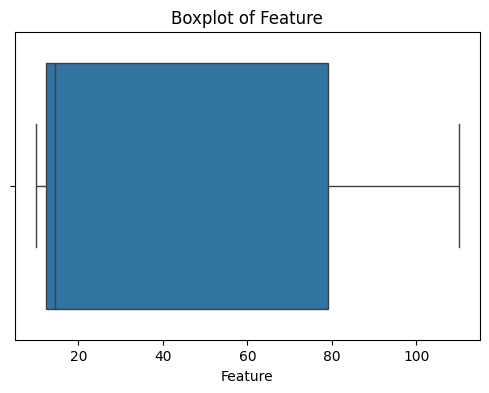

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset with outliers
data = {
    'Feature': [10, 12, 12, 13, 14, 15, 16, 100, 102, 110]  # Last three are outliers
}
df = pd.DataFrame(data)

# Plot boxplot to visualize outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Feature'])
plt.title('Boxplot of Feature')
plt.show()


In [48]:
# Calculate the IQR (Interquartile Range) to identify outliers
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Score'] >= lower_bound) & (df['Score'] <= upper_bound)]

print("\nData after Removing Outliers:")
print(df_no_outliers)

# Visualize the dataset again using a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(df_no_outliers['Score'], vert=False)
plt.title('Boxplot of Scores After Removing Outliers')
plt.xlabel('Score')
plt.show()


KeyError: 'Score'